In [1]:
import pandas as pd


train_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/train.csv', dtype={'grades': str})
dev_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/dev.csv', dtype={'grades': str})
test_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/test.csv', dtype={'grades': str})

In [2]:
total_rows = len(train_humi) + len(dev_humi) + len(test_humi)

train_proportion = len(train_humi) / total_rows
dev_proportion = len(dev_humi) / total_rows
test_proportion = len(test_humi) / total_rows

print(f"Train proportion: {train_proportion:.2f}")
print(f"Dev proportion: {dev_proportion:.2f}")
print(f"Test proportion: {test_proportion:.2f}")

Train proportion: 0.64
Dev proportion: 0.16
Test proportion: 0.20


In [3]:
len(train_humi) + len(dev_humi) + len(test_humi)

15095

# gotowe po preprocu

In [4]:
train_pp_humi = pd.read_csv('humi_multi/final_train_m.csv')
dev_pp_humi = pd.read_csv('humi_multi/final_dev_m.csv')
test_pp_humi = pd.read_csv('humi_multi/final_test_m.csv')

In [5]:
len(train_pp_humi) + len(dev_pp_humi) + len(test_pp_humi)

74430

In [6]:
74430/5

14886.0

In [7]:
import pandas as pd
full_dataset = pd.read_csv('humi_multi/full_dataset.csv')

In [8]:
full_dataset

,id,original,annotator_id,is_humorous,is_not_humorous
0,1723,Thousands of gay and bisexual swans convicted ...,1,1,0
1,1723,Thousands of gay and bisexual swans convicted ...,2,1,0
2,1723,Thousands of gay and bisexual swans convicted ...,3,1,0
3,1723,Thousands of gay and bisexual swans convicted ...,4,0,1
4,1723,Thousands of gay and bisexual swans convicted ...,5,0,1
...,...,...,...,...,...
74425,5255,Here 's What 's In The House-Approved Health f...,1,1,0
74426,5255,Here 's What 's In The House-Approved Health f...,2,1,0
74427,5255,Here 's What 's In The House-Approved Health f...,3,0,1
74428,5255,Here 's What 's In The House-Approved Health f...,4,0,1


In [9]:
humor_counts = full_dataset['is_humorous'].value_counts()


In [10]:
humor_counts

1    42572
0    31858
Name: is_humorous, dtype: int64

In [11]:

humorous_count = full_dataset['is_humorous'].sum()

not_humorous_count = full_dataset['is_not_humorous'].sum()
print(f"Number of humorous texts: {humorous_count}")
print(f"Number of non-humorous texts: {not_humorous_count}")

Number of humorous texts: 42572
Number of non-humorous texts: 31858


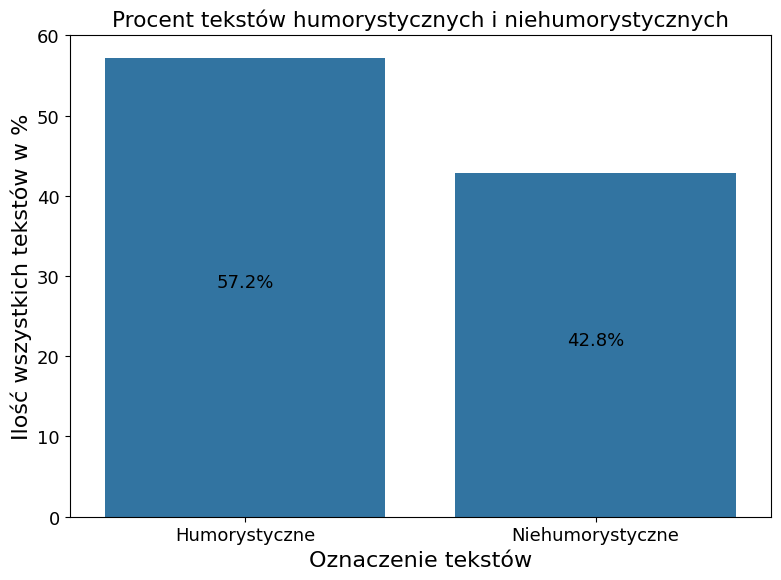

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

humorous_count = full_dataset['is_humorous'].sum()
not_humorous_count = full_dataset['is_not_humorous'].sum()

total_count = humorous_count + not_humorous_count

# Obliczenie procentowych wartości
humorous_percent = (humorous_count / total_count) * 100
not_humorous_percent = (not_humorous_count / total_count) * 100

#sns.set_palette("Blues_r", as_cmap=)
plt.rcParams.update({'font.size': 13})

# Utworzenie DataFrame z danymi
data = {'Type': ['Humorystyczne', 'Niehumorystyczne'], 'Count': [humorous_percent, not_humorous_percent]}
df = pd.DataFrame(data)

# Utworzenie wykresu słupkowego
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Type', y='Count', data=df, color='#1f77b4')

# Dodanie procentowych wartości na środku słupków
for i, row in df.iterrows():
    barplot.text(i, row.Count/2, f'{row.Count:.1f}%', color='black', ha='center')

plt.title("Procent tekstów humorystycznych i niehumorystycznych")
plt.xlabel("Oznaczenie tekstów", fontsize=16)
plt.ylabel("Ilość wszystkich tekstów w %", fontsize=16)

plt.tight_layout()

plt.savefig("hum_nothum_bar.jpg", dpi=300)

plt.show()

# podział anotatorow grades:


In [29]:
train_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/train.csv', dtype={'grades': str})
train_humi = train_humi[train_humi['grades'].str.len() == 5]
train_humi.drop(columns=['edit'], inplace=True)
annotators = ["annotator_1", "annotator_2", "annotator_3", "annotator_4", "annotator_5"]

for i, annotator in enumerate(annotators):
    train_humi[annotator] = [int(grade[i]) for grade in train_humi['grades']]


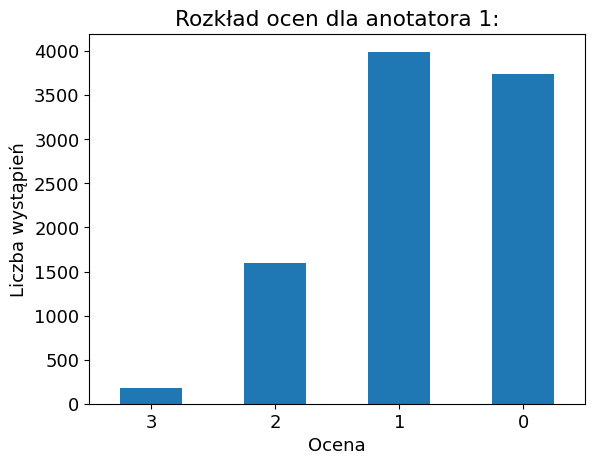

In [44]:
import matplotlib.pyplot as plt

name = f'annotator_3'
annotator_tmp = train_humi[name].value_counts()

# Sortowanie indeksu
annotator_tmp = annotator_tmp.sort_index(ascending=False)

annotator_tmp.plot(kind='bar', color='#1f77b4')
plt.title(f"Rozkład ocen dla anotatora 1:")
plt.xlabel('Ocena')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)
plt.show()

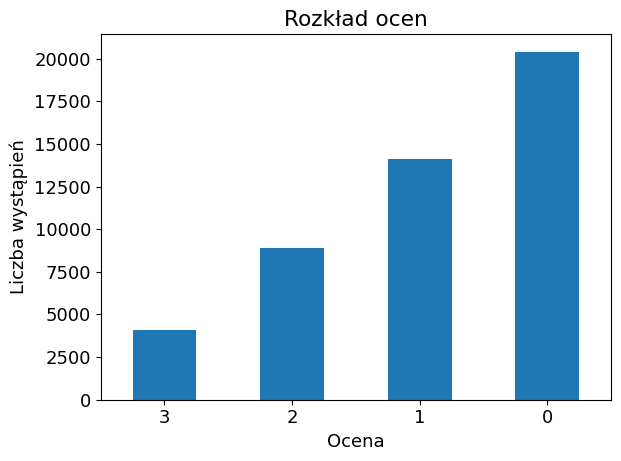

In [62]:
import matplotlib.pyplot as plt

# Lista nazw kolumn dla anotatorów
annotators = ['annotator_1', 'annotator_2', 'annotator_3','annotator_4', 'annotator_5']

# Inicjalizacja pustego DataFrame
global_distribution = pd.Series(dtype='int64')

for name in annotators:
    annotator_tmp = train_humi[name].value_counts()
    annotator_tmp = annotator_tmp.sort_index(ascending=False)
    global_distribution = global_distribution.add(annotator_tmp, fill_value=0)

# Sortowanie indeksu
global_distribution = global_distribution.sort_index(ascending=False)

global_distribution.plot(kind='bar', color='#1f77b4')
plt.title("Rozkład ocen")
plt.xlabel('Ocena')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)

# Użyj tight_layout przed zapisaniem wykresu
plt.tight_layout()

plt.savefig("rozklad_ocen_humi.jpg", dpi=300)
plt.show()